<a href="https://colab.research.google.com/github/Akshay1781/-Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##Mount the drive and import the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read the dataset 
df2 = pd.read_csv('/content/drive/MyDrive/Capstone Project 2/SeoulBikeData.csv',encoding = 'latin')

##summary of data


In [6]:
#Getting the Shape of the dataset with rows and columns
df2.shape

(8760, 14)

our dataset has 8760 columns and 14 columns

In [7]:
# Check details about the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#View the top 5 rows of the dataset
df2.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
#View the last 5 rows of the datasets
df2.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
# Print the unique value 
df2.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [11]:
#Looking for the description of the dataset to get insights of the data
df2.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


##Preprocessing the dataset





In [12]:
#check for count of missing values in each column
df2.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no null values present in our dataset

In [13]:
# to find duplicated data in our datasets

value = len(df2[df2.duplicated()])
print('The numbers of duplicate data present in our datatset is:', value )

The numbers of duplicate data present in our datatset is: 0


In [14]:
# Columns present in our dataset
df2.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [15]:
# Changing the Columns Name
df2.rename(columns= {'Rented Bike Count':'Rented_Bike_Count',
                    'Temperature(°C)':'Temperature',
                    'Humidity(%)':'Humidity',
                    'Wind speed (m/s)':'Wind_speed',
                    'Visibility (10m)':'Visibility',
                    'Dew point temperature(°C)':'Dew_point_temperature',
                    'Solar Radiation (MJ/m2)':'Solar_Radiation',
                    'Rainfall(mm)':'Rainfall',
                    'Snowfall (cm)':'Snowfall',
                    'Functioning Day':'Functioning_Day'},inplace=True)

In [16]:
df2.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [18]:
#change the date string to date time format
df2['Date'] = pd.to_datetime(df2['Date'])

In [19]:
df2.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [22]:
#Breakdown the date column into (day,month,year)
df2['day'] = df2['Date'].dt.day_name()
df2['month'] = df2['Date'].dt.month
df2['year'] = df2['Date'].dt.year
df2.drop(columns = 'Date', axis=1, inplace=True)

In [23]:
# Making the new columns of Weekdays_Weekend into the dataset
df2['weekdays_weekend'] = df2['day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [24]:
df2.drop(columns={'day','year'},axis=1,inplace=True)

In [25]:
df2.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

##Exploratory Data Analysis Of The Dataset

####Analysation of categorical variables

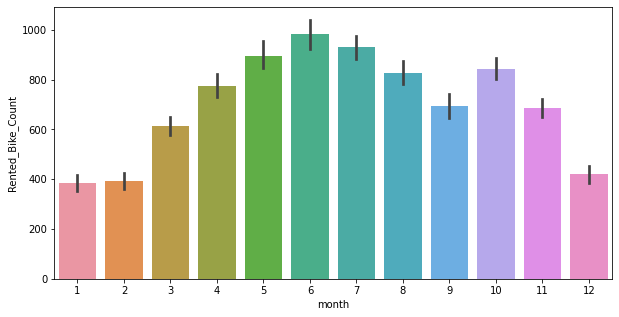

In [27]:
#Analysing on Month Basis
plt.figure(figsize=(10,5))
sns.barplot(data=df2,x='month',y='Rented_Bike_Count')

*   from the above barplot we can say that the demand of Rented Bike 
is high from month 5 to 10 with respect to other month

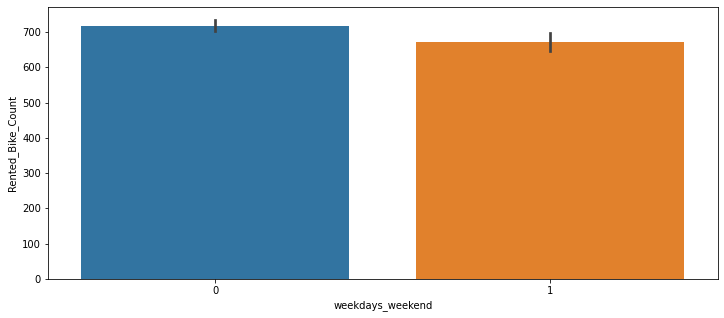

In [28]:
# Count of Rented Bike according to weekdays and Weekend
plt.figure(figsize = (12,5))
sns.barplot(data=df2, x='weekdays_weekend', y='Rented_Bike_Count')
plt.show()



*   From the above barplot we can say that weekdays has high demand over weekend 


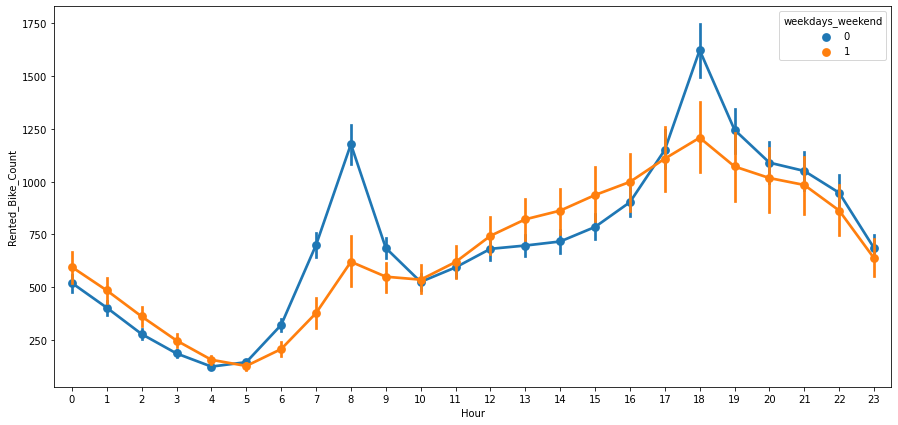

In [29]:
#Count of Rented Bike on Hour Basis and weekdays_weekend
plt.figure(figsize = (15,7))
sns.pointplot(data=df2,x='Hour', y='Rented_Bike_Count',hue='weekdays_weekend')

*    From the above Pointplot we can say that in weekdays which is 
shown in blue colour show that demand for bike is higher than weekends
*   The time in which high numbers of Bike are rented is from 7am to 9am in the Morning and 5pm to 7pm in Evening
*   The orange colour Plot show that in weekends less numbers of bike are rented in the morning time and it gradually increases in the evening time




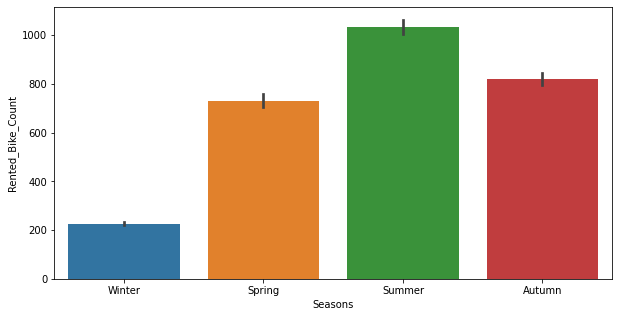

In [30]:
# Analysing Bike rented wrt Seasons
plt.figure(figsize=(10,5))
sns.barplot(data=df2, x='Seasons', y='Rented_Bike_Count')




*   From the above barplot we can say that Summer Season has higher numbers of bike rented followed by Autumn Season and winter Season has lowest number of bike rented

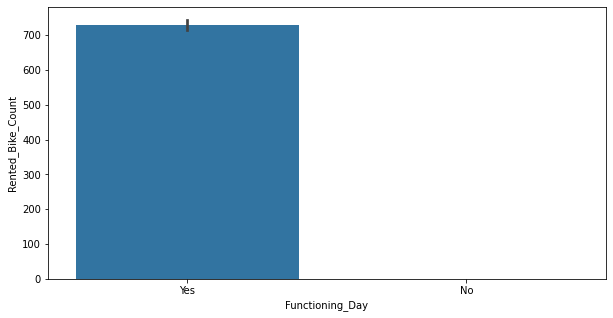

In [31]:
#Analysing according to Functioning Day
plt.figure(figsize=(10,5))
sns.barplot(data=df2, x='Functioning_Day', y='Rented_Bike_Count')



*   From the above barplot we can say that the bike rented is only for functional hours and there are no bike rented on non-functioning hours



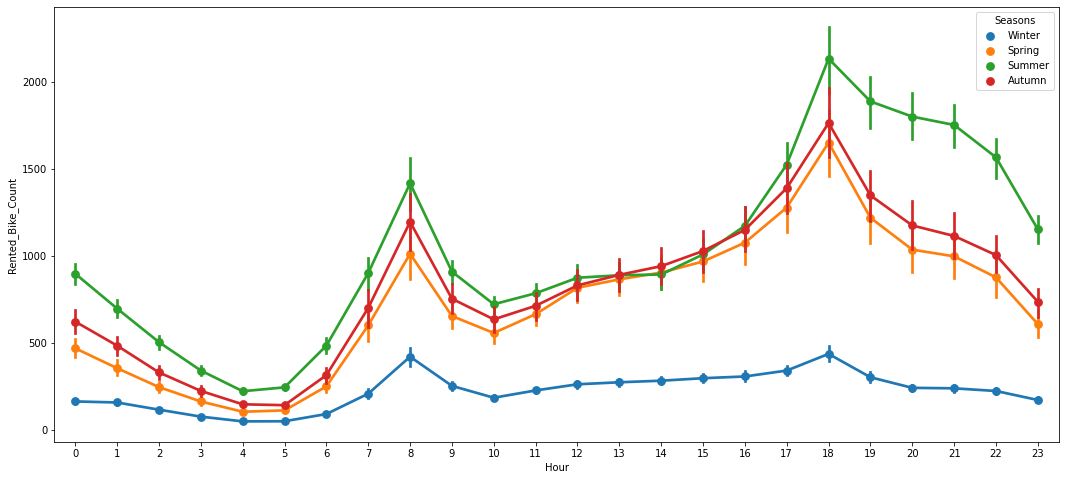

In [32]:
# Analysing the bike rented according to seasons and hour
plt.figure(figsize=(18,8))
sns.pointplot(data=df2, x="Hour", y='Rented_Bike_Count', hue='Seasons')



*   From the above pointplot which shows the use of rented bike in four different seasons, and it clearly shows that,
*   The Summer Season has the highest number of rented bike at the time 7am-9am and 7pm-5pm.
*   In Winter Season the lowest numbers of bike is rented



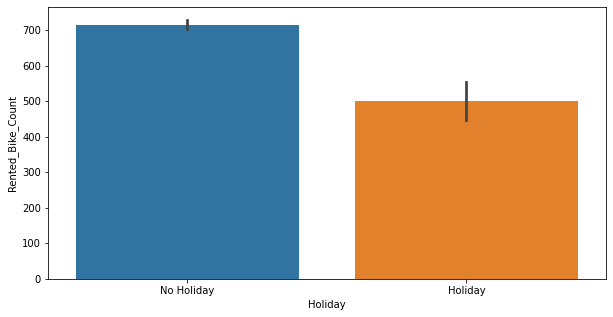

In [33]:
#Analysing according to Holiday
plt.figure(figsize = (10,5))
sns.barplot(data=df2, x='Holiday', y='Rented_Bike_Count')




*   From the above barplot we can say that the higher bike rented is on weekdays 
*   Weekends has lower numbers of bike rented



## Analysing on Numerical Variables

In [34]:
numerical_variables = list(df2.select_dtypes(['int64','float64']).columns)
numerical_variables


['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'month',
 'weekdays_weekend']

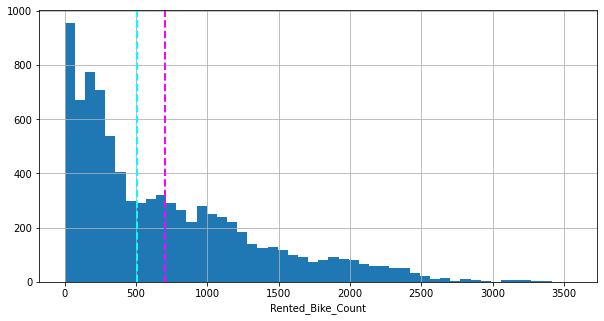

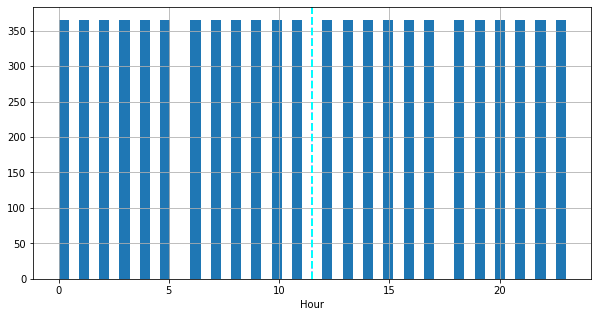

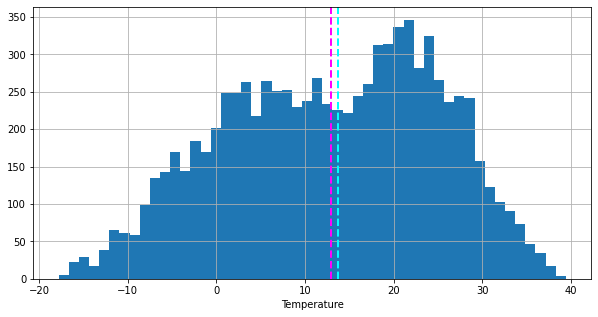

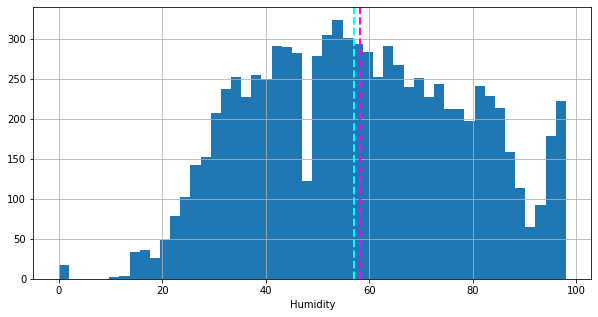

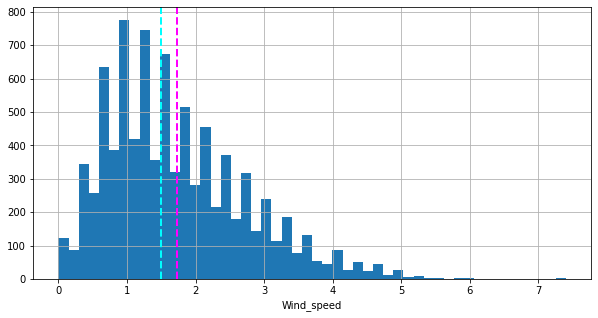

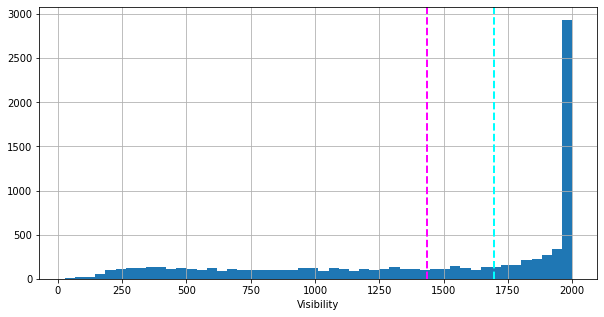

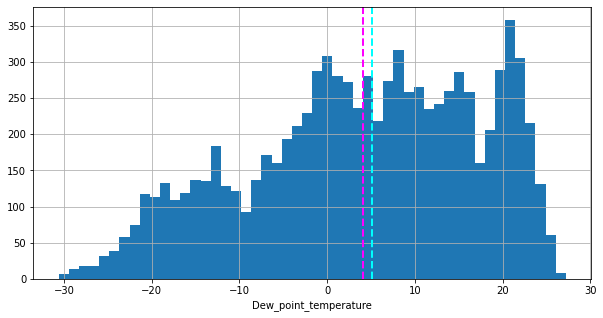

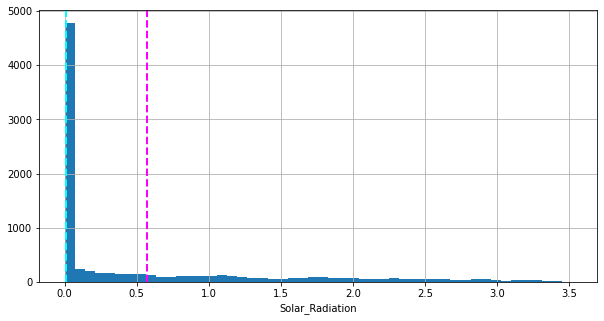

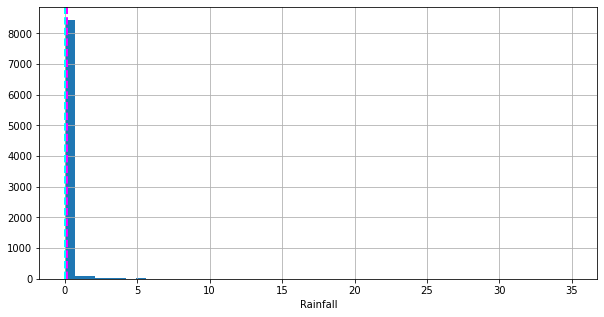

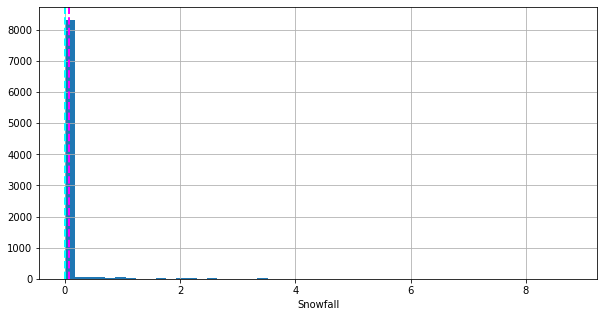

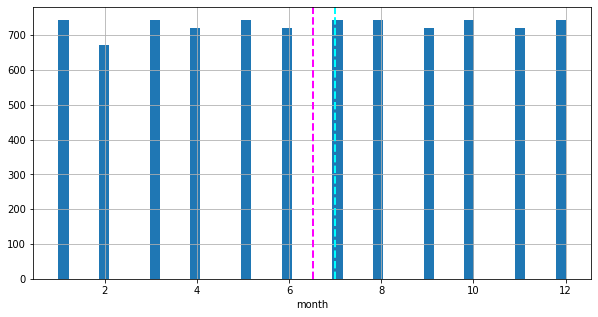

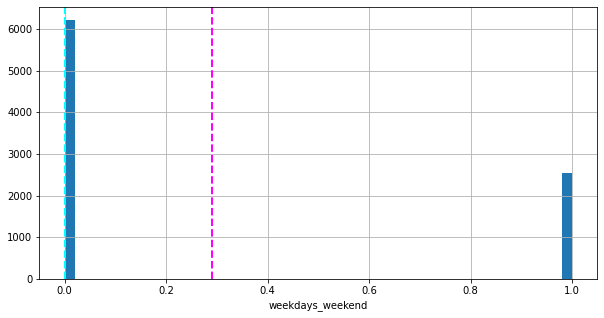

In [36]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_variables:
  fig = plt.figure(figsize = (10,5))
  ax = fig.gca()
  feature = df2[col]
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.xlabel(col)
  plt.show()

### Analysing Rented_Bike_Count (Dependent Variable) Vs ('Temperature','Snowfall','Rainfall')

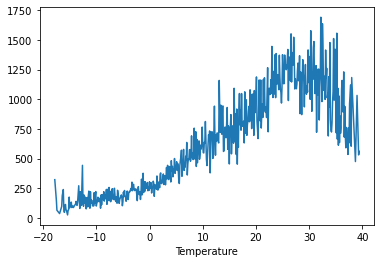

In [37]:
df2.groupby('Temperature').mean()['Rented_Bike_Count'].plot()



*  From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average


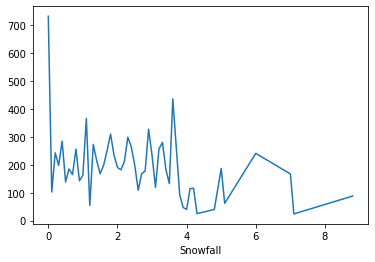

In [39]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df2.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()



*   We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower and when 0 cm of snow we have highest numbers of rented bike



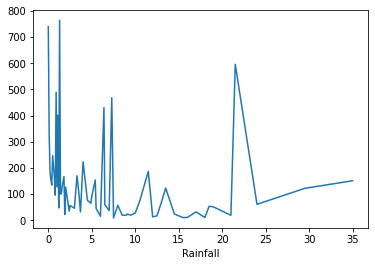

In [40]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
df2.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()



*   We can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes


## Regression Plot to show their Linear Relationship with Target Variable

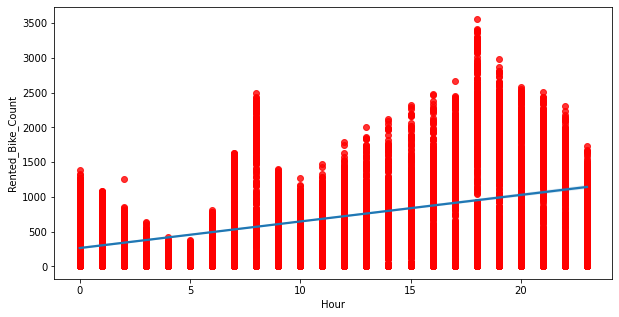

In [41]:
plt.figure(figsize=(10,5))
sns.regplot(x=df2['Hour'], y='Rented_Bike_Count', data=df2,scatter_kws = {'color':'red'})

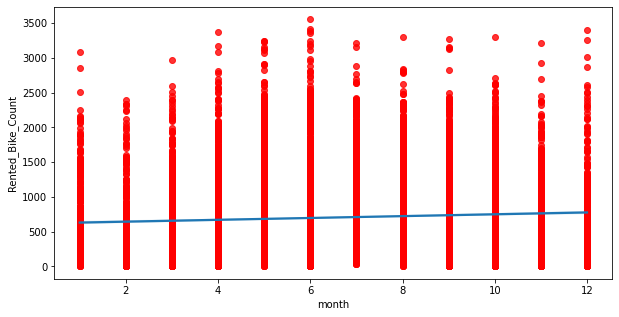

In [42]:
plt.figure(figsize=(10,5))
sns.regplot(x=df2['month'], y='Rented_Bike_Count', data=df2,scatter_kws = {'color':'red'})

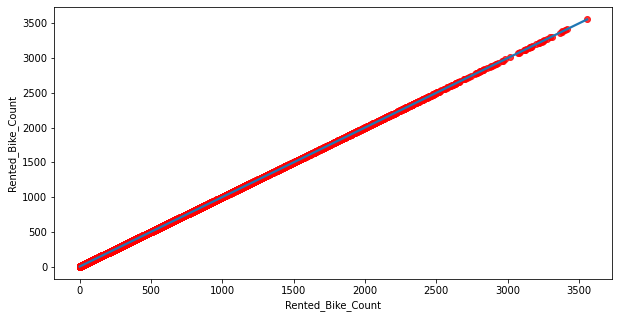

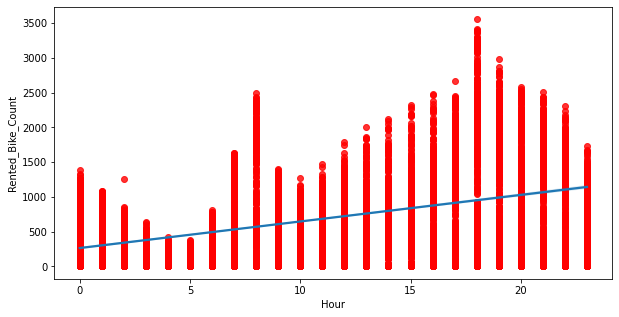

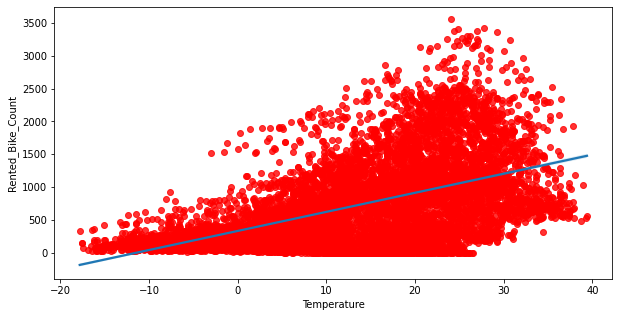

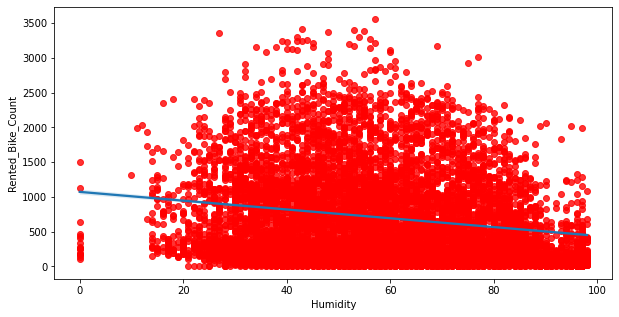

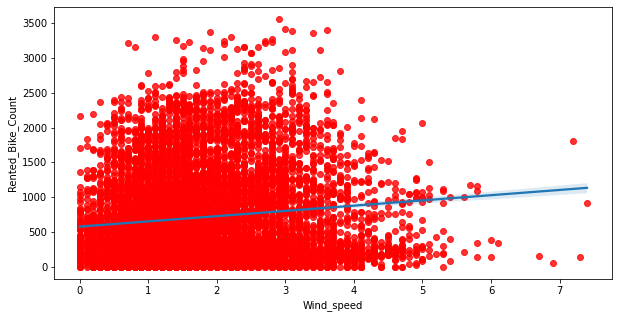

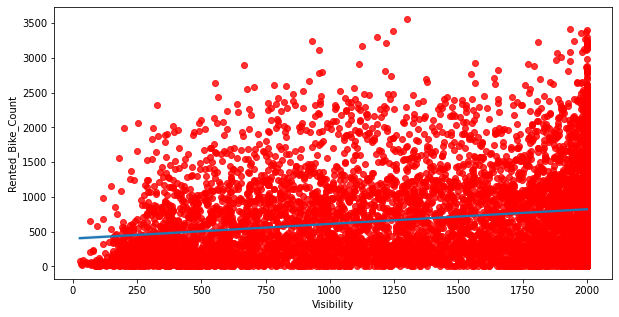

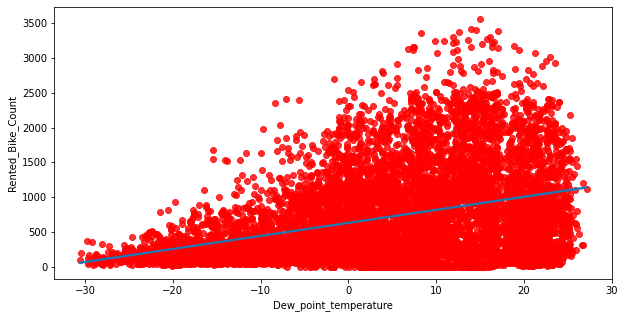

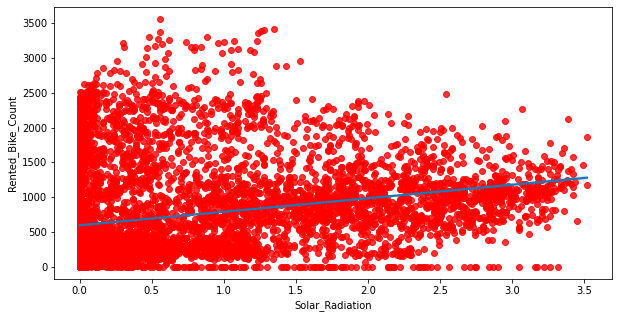

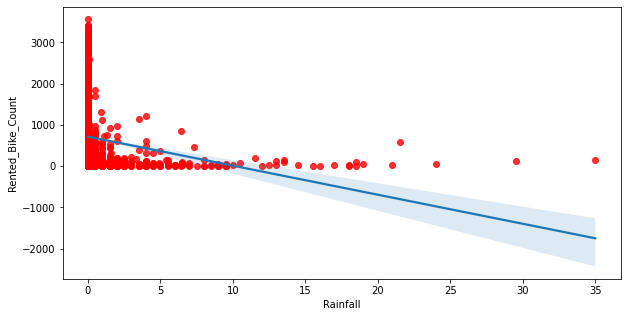

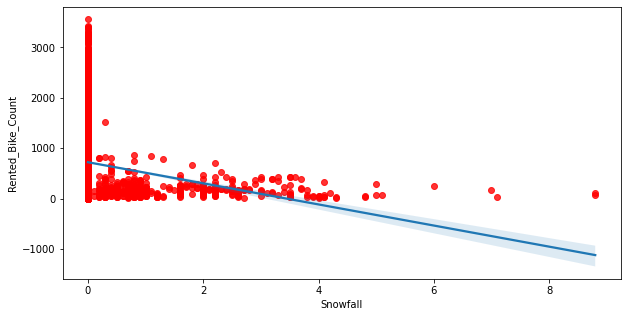

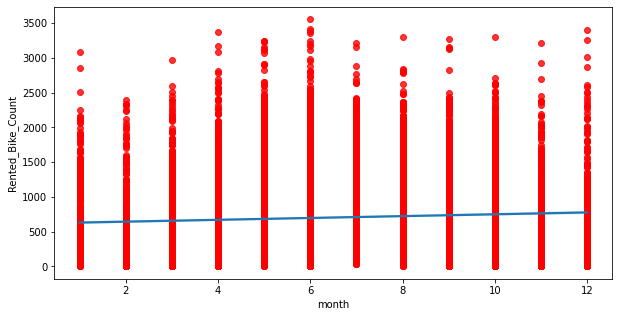

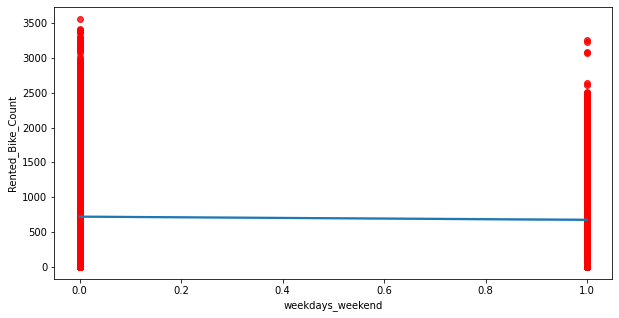

In [43]:
#printing the regression plot for all the numerical features
for col in numerical_variables:
  plt.figure(figsize=(10,5))
  sns.regplot(x=df2[col], y='Rented_Bike_Count',data=df2, scatter_kws ={'color':'red'})



*   From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable which means the rented bike count increases with increase of these features.
*   Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.




## Normalise Dependent Variable Column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


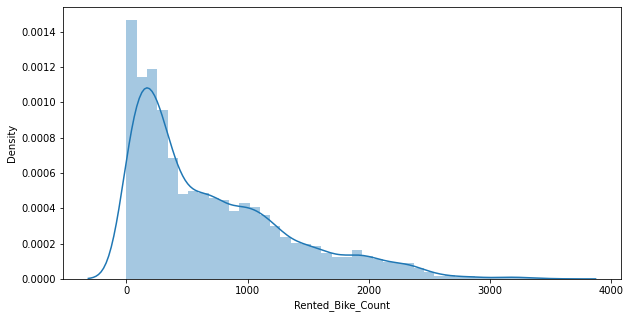

In [44]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,5))
sns.distplot(df2['Rented_Bike_Count'],hist=True)
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
plt.show()





*   The above graph show that the dependent variable has moderate right skewness. Since the assumption is that the dependent variable has to be normal. So we have to perform some operation to make the above plot normal with the help of normalization




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


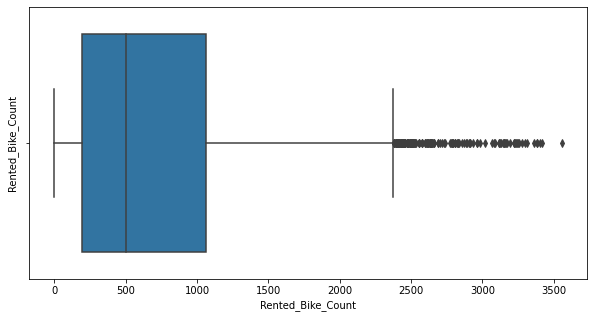

In [45]:
#Boxplot to chech the outliers 
plt.figure(figsize=(10,5))
sns.boxplot(df2['Rented_Bike_Count'])
plt.ylabel('Rented_Bike_Count')
plt.show()



*   The above boxplot shows that there are outliers present in dependent variable columns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

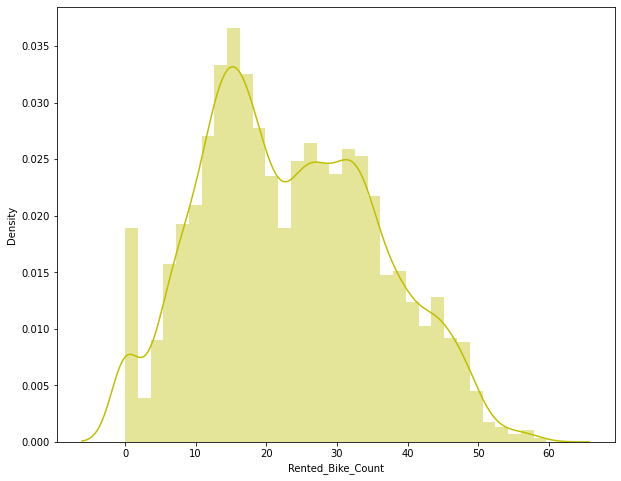

In [46]:
#Applyng Normalization for Rented_Bike_Count to improve the skewness 
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df2['Rented_Bike_Count']),color='y')
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')




*   Since after applying Square root for right Skewness to make it normal, here we get almost normal distribution curve


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


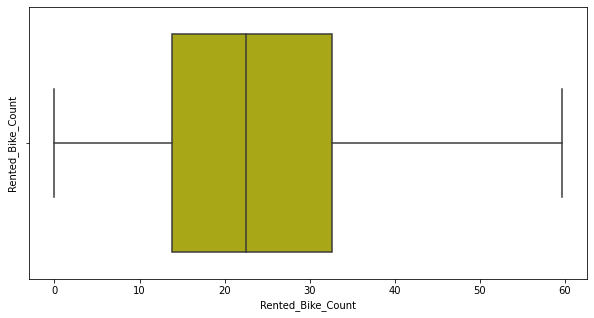

In [47]:
#Removing the outliers from the dependent variable column
plt.figure(figsize=(10,5))
sns.boxplot(np.sqrt(df2['Rented_Bike_Count']),color='y')
plt.ylabel('Rented_Bike_Count')
plt.show()



*  From the above boxplot we can see that we have removed the outliers present in the target variable column

##Normalize the independent variable

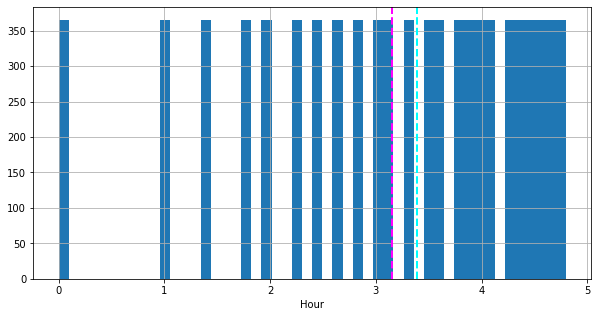

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


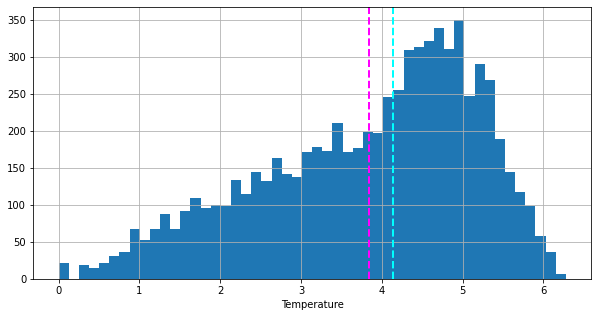

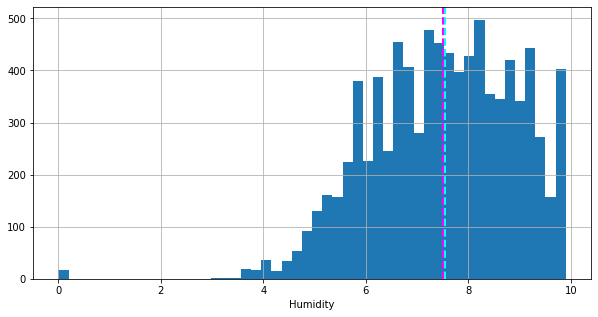

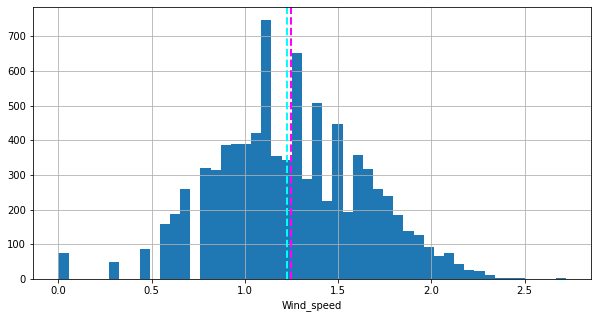

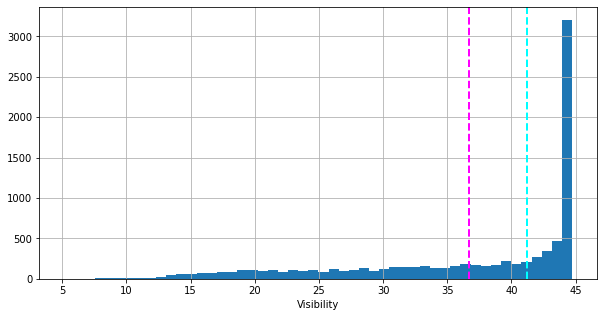

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


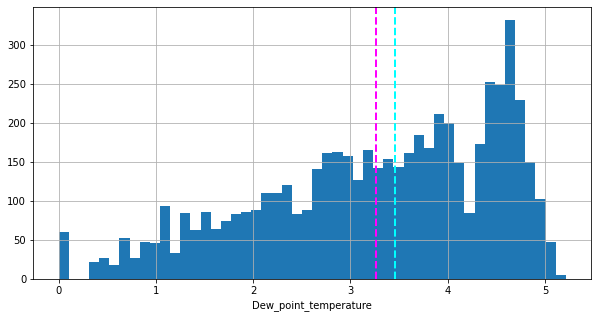

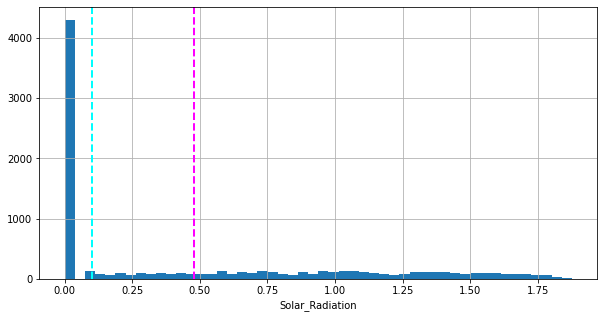

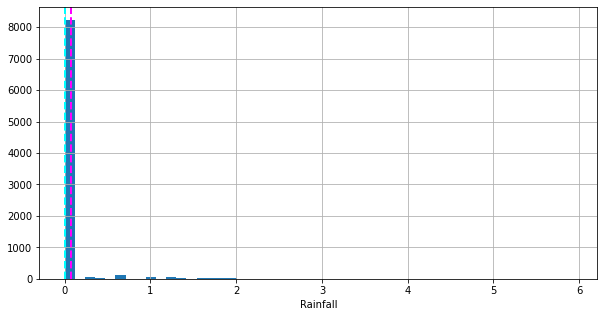

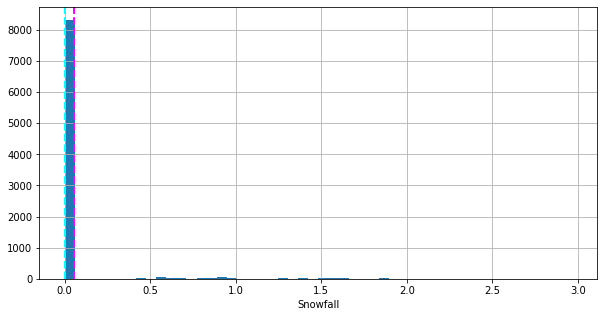

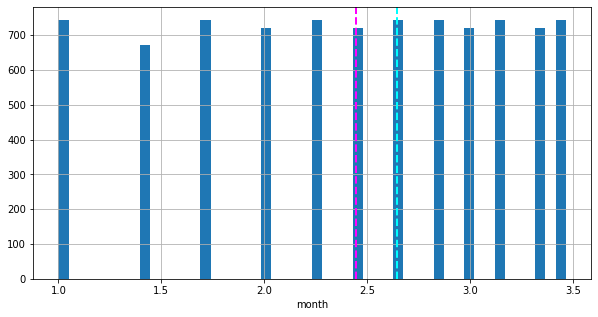

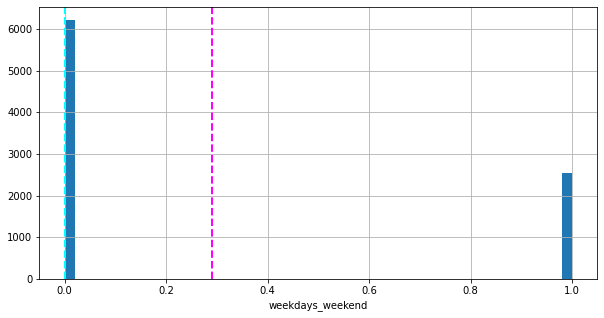

In [48]:
#Normalizing the independent variable which is not in normal distribution 
for col in numerical_variables[1:]:
  fig = plt.figure(figsize = (10,5))
  ax = fig.gca()
  feature = np.sqrt(df2[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.xlabel(col)
  plt.show()


##Heatmap

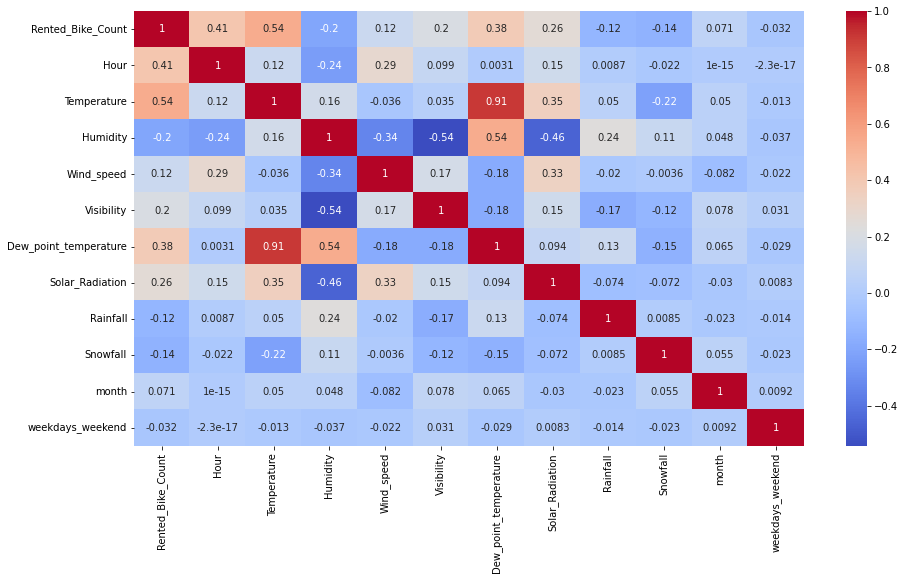

In [49]:
plt.figure(figsize=(15,8))
correlation = df2.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')



*   From the above heatmap, we can see that the relation between tempearture and dew_point_temperature is very high i.e 0.91. so we can remove dew_point_temperature variable from the column then it don't affect the outcome of our analysis.

In [50]:
df2.drop(columns='Dew_point_temperature',axis=1,inplace=True)

##Creating Dummy Variables

In [51]:
#Creating the dummy variables
from sklearn.preprocessing import LabelEncoder
ohe=LabelEncoder()
ohe

LabelEncoder()

In [52]:
df2 = pd.get_dummies(df2, columns=['Hour','Seasons'])

In [53]:
df2.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Holiday',
       'Functioning_Day', 'month', 'weekdays_weekend', 'Hour_0', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

In [54]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
Label1 = le1.fit_transform(df2['Holiday'])


In [55]:
le2=LabelEncoder()
Label2 = le2.fit_transform(df2['Functioning_Day'])

In [56]:
le1.classes_

array(['Holiday', 'No Holiday'], dtype=object)

In [57]:
le2.classes_

array(['No', 'Yes'], dtype=object)

In [58]:
df2.drop(columns = {'Functioning_Day','Holiday'},inplace=True,axis=1)

In [59]:
df2['Holiday'] = Label1

In [60]:
df2['Functioning_Day'] = Label2

In [61]:
df2.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,month,weekdays_weekend,...,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday,Functioning_Day
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,1,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,1,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,1,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,1,1


## Model Training

### Train Test Split for regression

In [62]:
# Assign the value of X and y
X = df2.iloc[:,1:]
y = df2.iloc[:,0]

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       8760 non-null   float64
 1   Humidity          8760 non-null   int64  
 2   Wind_speed        8760 non-null   float64
 3   Visibility        8760 non-null   int64  
 4   Solar_Radiation   8760 non-null   float64
 5   Rainfall          8760 non-null   float64
 6   Snowfall          8760 non-null   float64
 7   month             8760 non-null   int64  
 8   weekdays_weekend  8760 non-null   int64  
 9   Hour_0            8760 non-null   uint8  
 10  Hour_1            8760 non-null   uint8  
 11  Hour_2            8760 non-null   uint8  
 12  Hour_3            8760 non-null   uint8  
 13  Hour_4            8760 non-null   uint8  
 14  Hour_5            8760 non-null   uint8  
 15  Hour_6            8760 non-null   uint8  
 16  Hour_7            8760 non-null   uint8  


In [64]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented_Bike_Count, dtype: int64

In [65]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)


In [66]:
X_train.shape , X_test.shape

((7008, 39), (1752, 39))



##Linear Regression


In [67]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model1 = reg.fit(X_train, y_train)

In [68]:
# Chech the Score
model1.score(X_train, y_train)

0.6609636677586375

In [69]:
#Chech the coefficient
model1.coef_

array([ 2.29702031e+01, -6.42641163e+00,  2.43201348e+00,  1.14608522e-02,
        7.05116339e+01, -5.79230222e+01,  2.43235398e+01,  4.22957365e+00,
       -4.55279704e+01, -7.77093297e+09, -7.77093308e+09, -7.77093318e+09,
       -7.77093327e+09, -7.77093332e+09, -7.77093330e+09, -7.77093315e+09,
       -7.77093284e+09, -7.77093251e+09, -7.77093294e+09, -7.77093318e+09,
       -7.77093318e+09, -7.77093315e+09, -7.77093316e+09, -7.77093317e+09,
       -7.77093306e+09, -7.77093295e+09, -7.77093266e+09, -7.77093221e+09,
       -7.77093250e+09, -7.77093252e+09, -7.77093253e+09, -7.77093263e+09,
       -7.77093287e+09,  4.12897678e+11,  4.12897678e+11,  4.12897678e+11,
        4.12897678e+11,  1.32761998e+02,  9.32668018e+02])

In [70]:
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)

In [71]:
y_pred_test

array([ 666.07824707,  813.1729126 , 1388.3190918 , ..., 1165.20092773,
       1135.56066895, 1155.52539062])

In [72]:
y_test

3252    1105
4277     247
7216    1636
2491    1478
7823     916
        ... 
3638    1536
8514    1857
5084     778
3350     996
4788     988
Name: Rented_Bike_Count, Length: 1752, dtype: int64

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Calculate MSE
MSE_lr = mean_squared_error((y_train),(y_pred_train))
print('MSE:', MSE_lr)

#Calculate RMSE
RMSE_lr = np.sqrt(MSE_lr)
print('RMSE:', RMSE_lr)

#Calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

#Calculate R2_score
from sklearn.metrics import r2_score
R2_lr = r2_score(y_train, y_pred_train)
print('R2_Score:', R2_lr)


MSE: 141407.02021327973
RMSE: 376.04124802111767
MAE : 283.0253580607236
R2_Score: 0.6609636677586375


***Looks like our r2 score value is 0.66 that means our model is able to capture most of the data variance***

In [74]:
from sklearn.metrics import mean_squared_error
#CAlculate MSE
MSE_lr = mean_squared_error(y_test, y_pred_test)
print("MSE:", MSE_lr)

#Calculate RMSE
RMSE_lr = np.sqrt(MSE_lr)
print('RMSE:', RMSE_lr)

#Calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#Calculate R2_score
R2_score = r2_score(y_test, y_pred_test)
print('R2_score:', R2_score)

MSE: 137195.40080918194
RMSE: 370.3989751729639
MAE : 277.86154206158363
R2_score: 0.6664387539351642


***The r2_score for the test set is 0.667 This means our linear model is performing well on the data***

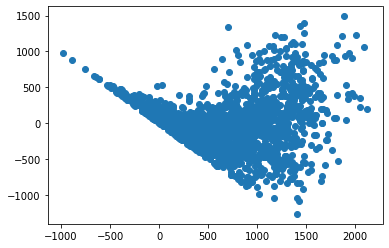

In [75]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

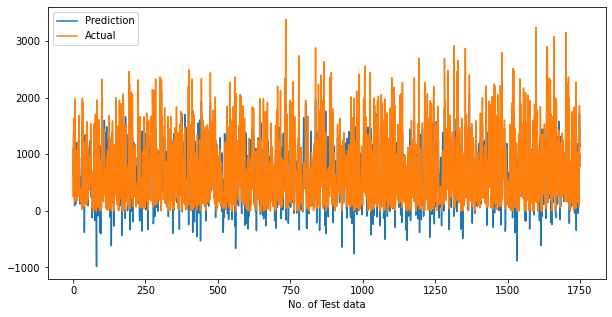

In [76]:
plt.figure(figsize=(10,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(['Prediction', 'Actual'])
plt.xlabel('No. of Test data')
plt.show()

## Decision Tree

In [77]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                           max_leaf_nodes=100)

In [78]:
dtr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [79]:
y_pred_train_dt = dtr.predict(X_train)
y_pred_test_dt = dtr.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error
print('Model score:', dtr.score(X_train, y_train))

#Calculate MSE
MSE_dt = mean_squared_error(y_train, y_pred_train_dt)
print('MSE:', MSE_dt)

#Calculate RMSE
RMSE_dt = np.sqrt(MSE_dt)
print('RMSE:', RMSE_dt)

# Calculate MAE
MAE_dt= mean_absolute_error(y_train, y_pred_train_dt)
print("MAE :",MAE_dt)

#Calculate R2_score
from sklearn.metrics import r2_score
R2_score = r2_score(y_train, y_pred_train_dt)
print('R2_score:', R2_score)

Model score: 0.7127730470923096
MSE: 119798.09735170724
RMSE: 346.1186174589677
MAE : 237.89792024930247
R2_score: 0.7127730470923096


***Looks like our r2 score value is 0.57 that means our model is not able to capture most of the data variance***

In [81]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_dt= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE_dt)

#calculate RMSE
RMSE_dt=np.sqrt(MSE_dt)
print("RMSE :",RMSE_dt)

#Calculate MAE
MAE_dt= mean_absolute_error(y_test, y_pred_test_dt)
print("MAE :",MAE_dt)

#Calculate R2_score
R2_score_dt= r2_score((y_test), (y_pred_test_dt))
print("R2 :", R2_score_dt)


MSE : 131790.0106707494
RMSE : 363.0289391642895
MAE : 250.7309733935434
R2 : 0.6795808028625175


***The r2_score for the test set is 0.53. This means our linear model is not performing well on the data***

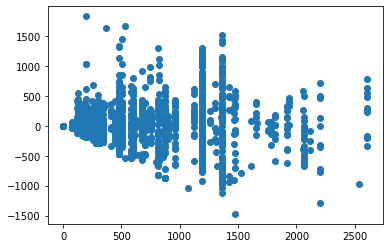

In [82]:
### Heteroscadacity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

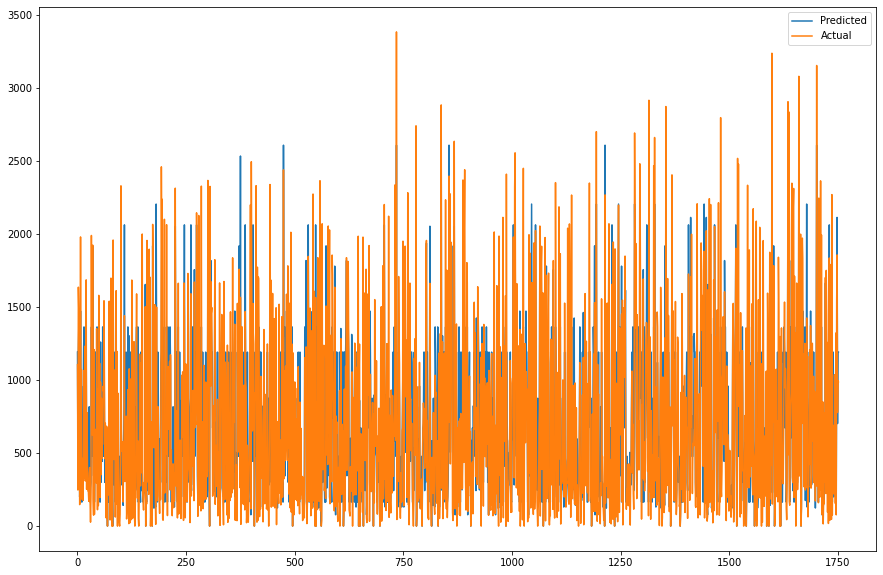

In [83]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

[link text](https://)##Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [85]:
# Making predictions on train and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

In [86]:
from sklearn.metrics import mean_squared_error
print('Model Score:', rf.score(X_train, y_train))

#Calculate MSE
MSE_rf = mean_squared_error(y_train, y_pred_train_rf)
print('MSE:', MSE_rf)

# Calculate RMSE
RMSE_rf = np.sqrt(MSE_rf)
print('RMSE:', RMSE_rf)

# Calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE_rf)

#Calculate R2_Score
from sklearn.metrics import r2_score
r2_rf = r2_score(y_train, y_pred_train_rf)
print('R2_score:', r2_rf)


Model Score: 0.983565250161126
MSE: 6854.690136900684
RMSE: 82.79305609107979
MAE : 49.84155821917808
R2_score: 0.983565250161126


***Looks like our r2 score value is 0.98 that means our model is able to capture most of the data variance.***

In [87]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf)


from sklearn.metrics import r2_score
#calculate R2_score
r2_rf= r2_score((y_test), (y_pred_test_rf))
print("R2_Score :",r2_rf)

MSE : 47564.721565753425
RMSE : 218.09337808781225
MAE : 135.30292237442922
R2_Score : 0.8843565622417143


***The r2_score for the test set is 0.92. This means our linear model is performing well on the data.***

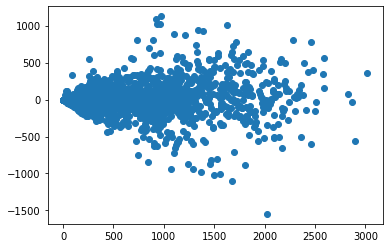

In [88]:
### Heteroscadacity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

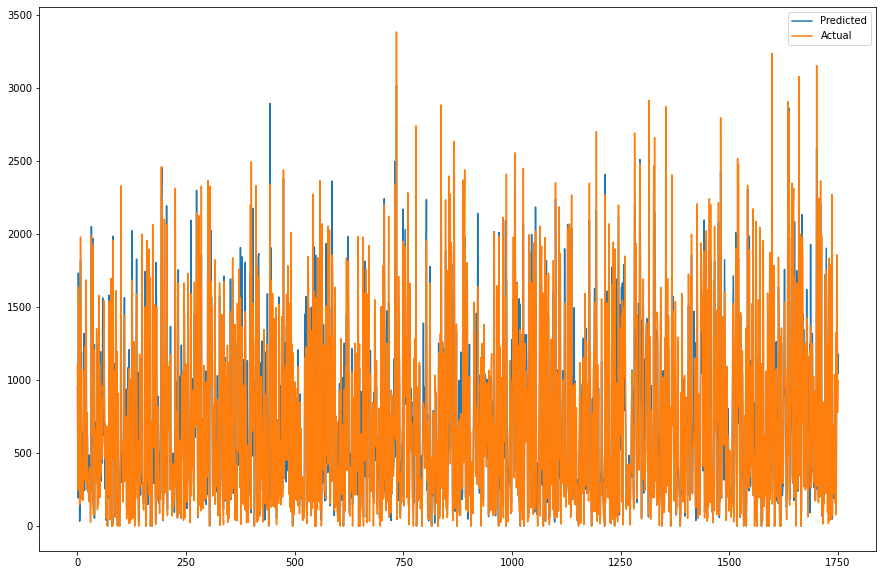

In [89]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##ELASTIC NET REGRESSION

In [90]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [91]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)


ElasticNet(alpha=0.1)

In [92]:
#check the score
elasticnet.score(X_train, y_train)

0.5719216316230334

In [93]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [94]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)

MSE : 178545.1314015968
RMSE : 422.5460109876755
MAE : 309.50191381404704
R2 : 0.5719216316230334


***Looks like our r2 score value is 0.57 that means our model is not able to capture most of the data variance.***

In [95]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)

MSE : 176128.42610623885
RMSE : 419.67657321589786
MAE : 310.27366987244267
R2 : 0.5717814377673838


***The r2_score for the test set is 0.57. This means our linear model is not performing well on the data. ***


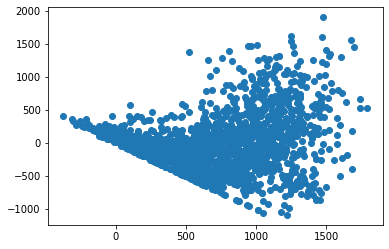

In [96]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

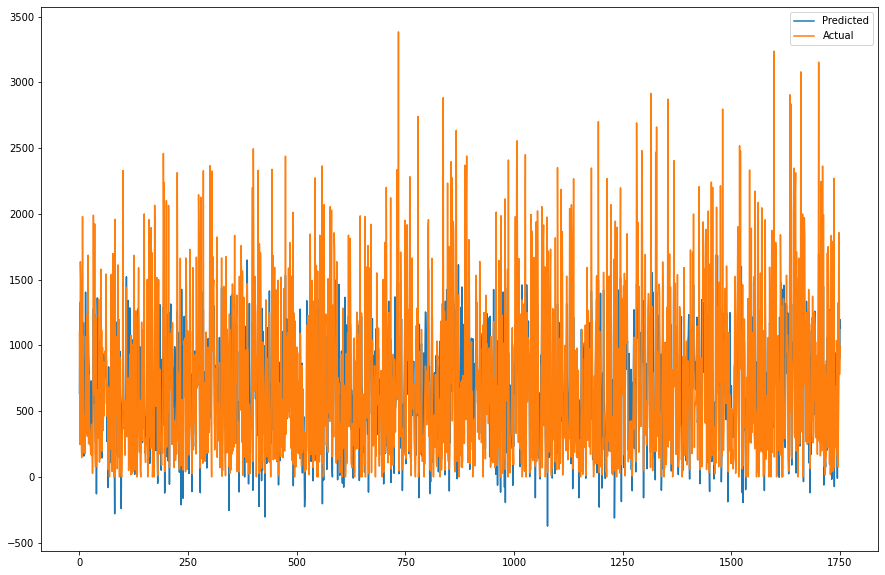

In [97]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##Conclusion



*   During the time of our analysis, we initially did EDA on all the features of our dataset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

*   We implemented 4 Machine Learning algorithm LinearRegression, Decision Tree, RandomForest, ElasticNet.

*   Random Forest Regressor gives highest R2 Score of 98% for training set and 92% for testing set

*   Decision Tree gives the lowest R2 Score of 57% for training set and 53% for testing set






